# Data Mining & Machine Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../dataset/SriLanka_Supermarket_Sales.csv')

# --- Initial Data Cleaning ---

# 1. Clean Currency Columns
currency_cols = ['Unit price', 'Tax 5%', 'Sales', 'cogs', 'gross income']
for col in currency_cols:
    df[col] = df[col].replace({'LKR ': '', ',': ''}, regex=True).astype(float)

# 2. Handle Missing Values in the Target Variable
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

## Feature Engineering & Data Splitting

In [2]:
# 1. Define Features (X) and Target (y)
X = df.drop(['Rating', 'Invoice ID'], axis=1)
y = df['Rating']

# 2. Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

# 3. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing Pipeline Setup

In [3]:
# 1. Create preprocessing pipelines for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# 2. Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

## Apply Data Mining Task: Linear Regression

In [4]:
# 1. Create the full pipeline with the preprocessor and the model
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 2. Train the pipeline
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs',
       'gross margin percentage', 'gross income', 'Inventory Level',
       'Restock Interval (Days)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                        

## Evaluate the Linear Regression Model

In [5]:
# 1. Make predictions on the test set
y_pred_lr = lr_pipeline.predict(X_test)

# 2. Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Mean Squared Error: {mse_lr}')
print(f'Linear Regression R-squared: {r2_lr}')

Linear Regression Mean Squared Error: 3.7813707257376215
Linear Regression R-squared: -0.36000379141587446


d:\softwares\anaconda\envs\kaveen2\lib\site-packages\sklearn\preprocessing\_encoders.py:174: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


## Apply Alternative Method: Random Forest Regressor

In [6]:
# 1. Create the full pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# 2. Train the pipeline
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Unit price', 'Quantity', 'Tax 5%', 'Sales', 'cogs',
       'gross margin percentage', 'gross income', 'Inventory Level',
       'Restock Interval (Days)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                        

## Evaluate the Random Forest Model

In [7]:
# 1. Make predictions on the test set
y_pred_rf = rf_pipeline.predict(X_test)

# 2. Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest Mean Squared Error: 2.8996803733293546
Random Forest R-squared: -0.042895972822886375


d:\softwares\anaconda\envs\kaveen2\lib\site-packages\sklearn\preprocessing\_encoders.py:174: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


## Feature Importance

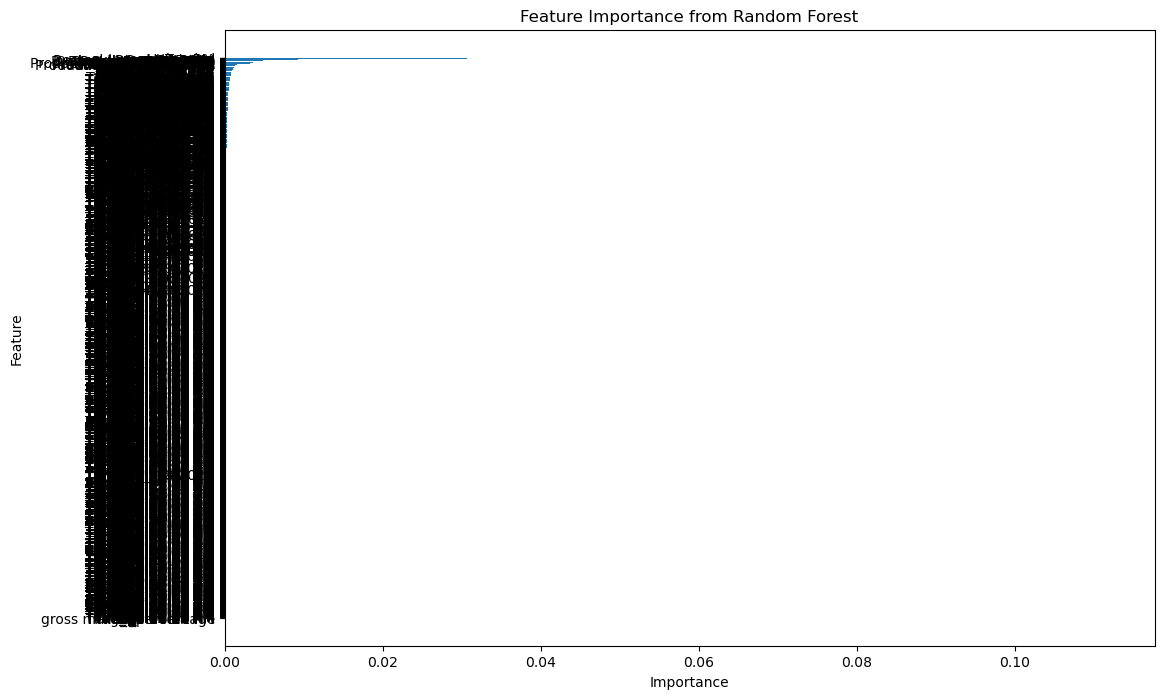

In [8]:
# 1. Get feature names from the ColumnTransformer
try:
    ohe_feature_names = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
    all_feature_names = np.concatenate([numerical_features, ohe_feature_names])
except AttributeError:
    # Fallback for older scikit-learn versions
    ohe_feature_names = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_features)
    all_feature_names = np.concatenate([numerical_features, ohe_feature_names])

# 2. Get feature importances from the model
importances = rf_pipeline.named_steps['regressor'].feature_importances_
feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances}).sort_values('importance', ascending=False)

# 3. Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()